# Ceci est le TP de data - initiation à utilisation des biblio de python

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import numpy
import seaborn as sns

sns.set()  # set default graphical style

# chargement des données de tips

In [7]:
Tips = pd.read_csv("tips.csv")

# Afichage des données :

In [6]:
Tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Affichage de ypes de données de chaque colonne

In [15]:
Tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

La méthode [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) d'un DataFrame ou d'une Series nous permet d'obtenir une liste de statistiques sur chacune des colonnes de type "numérique".

Afficher ces statistiques pour toutes les variables numériques du DataFrame, puis seulement pour la variable `tip`.

In [17]:
df = pd.DataFrame(data=Tips)
df.describe(include=[np.number])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


seulement pour la variable tip.

In [18]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

# Affichez à l'écran la moyenne, la médiane et le quantile 25% de la variable "total_bill".

In [21]:
print("moynne : ",df.total_bill.mean())
print("médiane : ",df.total_bill.median())
print("quantile 25%  : ",df.total_bill.quantile(0.25))

moynne :  19.78594262295082
médiane :  8.902411954856856
quantile 25%  :  13.3475


les quantiles 1%, 25%, 75% et 99% :

In [27]:
print("quantiles 1%, 25%, 75% et 99%\n", df.total_bill.quantile([0.1,0.25,0.75,0.99]))

quantiles 1%, 25%, 75% et 99%
 0.10    10.3400
0.25    13.3475
0.75    24.1275
0.99    48.2270
Name: total_bill, dtype: float64


Calculez l'écart-type de la variable total_bill avec 1) la fonction [std](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html) de pandas et 2) la fonction [std](https://numpy.org/doc/stable/reference/generated/numpy.std.html) de numpy

In [29]:
print("pandas result",df.total_bill.std())
print("numpy result",np.std( Tips.total_bill ) )

pandas result 8.902411954856856
numpy result 8.884150577771132


This issue is indeed already under discussion (link); problem seems to be the algorithm for calculating the standard deviation which is used by pandas since it is not as numerically stable as the one used by numpy.

An easy workaround would be to apply .values to the series first and then apply std to these values; in this case numpy's std is used:

In [31]:

print("pandas result with series values", pd.Series(df.total_bill).values.std())
print("ooooooooplaaaa!!!!!")

pandas result with series values 8.884150577771132
ooooooooplaaaa!!!!!


## Histogrammes
Matplotlib prend en entrée des types de données 1D "simples" comme des listes, tableaux numpy, ou Series pandas.

Initialisez une [figure](https://matplotlib.org/stable/api/figure_api.html#module-matplotlib.figure) matplotlib de largeur 7 et de hauteur 5 (en pouces), affichez l'histogramme de la variable `total_bill` grâce à la fonction [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) puis affichez des noms d'axes et de figure judicieux grâce aux fonctions [xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html), [ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel) et [title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html#matplotlib-pyplot-title).

bins =  [ 3.07        5.05916667  7.04833333  9.0375     11.02666667 13.01583333
 15.005      16.99416667 18.98333333 20.9725     22.96166667 24.95083333
 26.94       28.92916667 30.91833333 32.9075     34.89666667 36.88583333
 38.875      40.86416667 42.85333333 44.8425     46.83166667 48.82083333
 50.81      ]


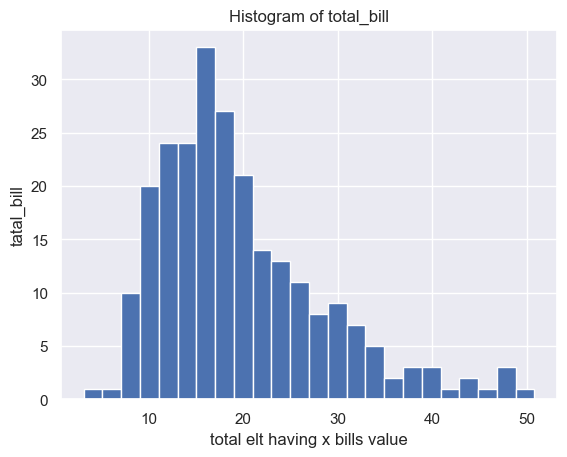

In [56]:
fig = plt.Figure()
gs = fig.add_gridspec(7,5)
bins = (int)(df.total_bill.count()/10)
x = df.total_bill.to_list()

n, bins, patches = plt.hist(x,bins,data=df.total_bill)
print("bins = ", bins)
plt.xlabel("total elt having x bills value")
plt.ylabel('total_bill')
plt.title(r'Histogram of total_bill')
plt.show()

<AxesSubplot: >

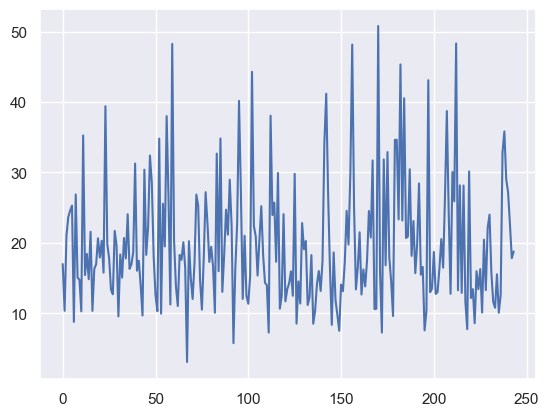

In [58]:
df.total_bill.plot()

array([[<AxesSubplot: title={'center': 'total_bill'}>,
        <AxesSubplot: title={'center': 'tip'}>],
       [<AxesSubplot: title={'center': 'size'}>, <AxesSubplot: >]],
      dtype=object)

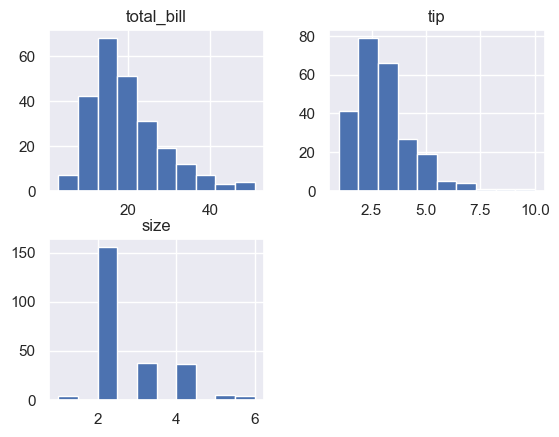

In [60]:
df.hist()

<AxesSubplot: >

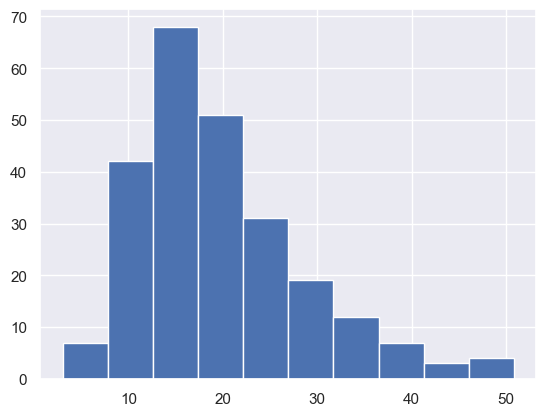

In [61]:
df.total_bill.hist()

<AxesSubplot: >

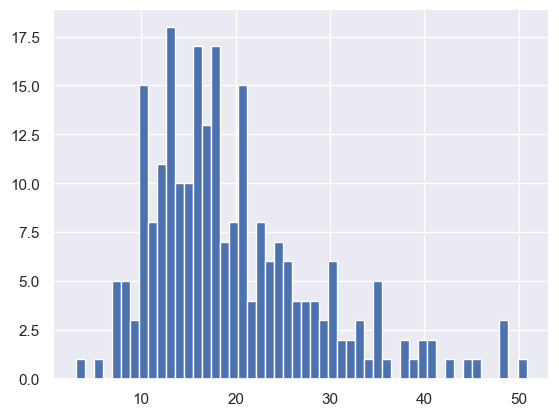

In [62]:
df.total_bill.hist(bins=50)

# avec seaborn
Seaborn est une surcouche de matplotlib. Cette librairie est adaptée aux DataFrame de pandas et les résultats sont souvent plus "jolis" qu'avec matplotlib seul. Chaque fonction de plot de seaborn prend en premier paramètre un DataFrame, puis les paramètres `x` et `y` servent à indiquer le **nom** des variables à utiliser (plus besoin de manipuler des Series ou des tableaux numpy, seaborn s'en charge!).

Une galerie d'exemples est disponible [ici](https://seaborn.pydata.org/examples/index.html).

<AxesSubplot: xlabel='tip', ylabel='Count'>

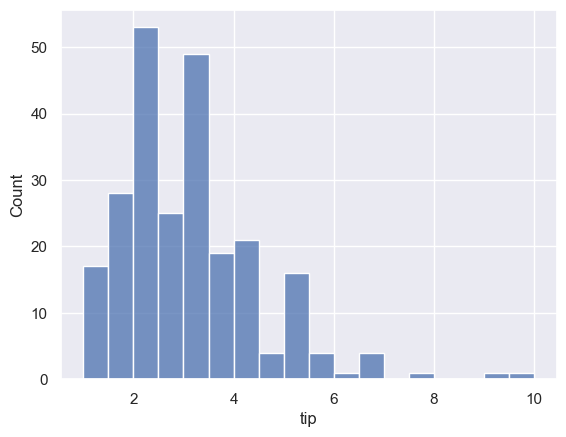

In [63]:
sns.histplot(data=df.tip)

taille tip 244
AxesSubplot(0.125,0.11;0.775x0.77)


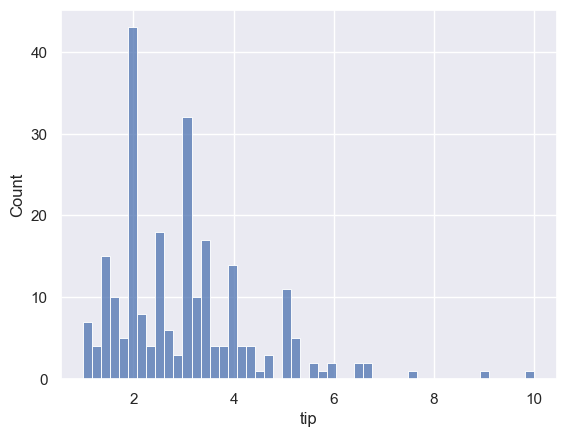

In [81]:
sns.histplot(bins=50,data=df.tip)

print("taille tip",df.tip.count())
print(sns.distributions.histplot())

densité AxesSubplot(0.125,0.11;0.775x0.77)


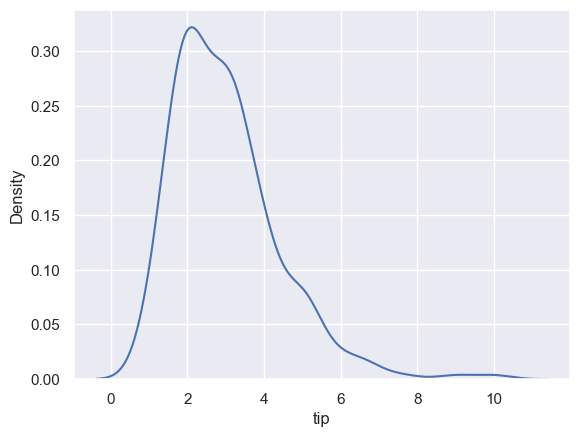

In [83]:
ss = sns.load_dataset("tips")
print("densité",sns.kdeplot(data=ss,x="tip"))

# Boxplot (boites à moustache)
this is the boxplot graph for total_bill and tip columns

<AxesSubplot: >

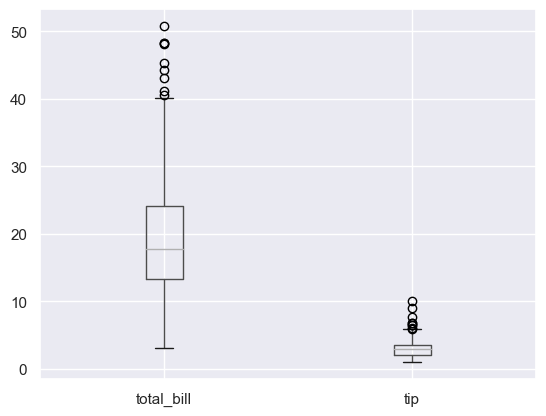

In [87]:
df.boxplot(column=['total_bill','tip'])

# Diagramme en violon

{'bodies': [<matplotlib.collections.PolyCollection at 0x243fb3edc40>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x243fb3ed4c0>,
 'cmins': <matplotlib.collections.LineCollection at 0x243fb3f1d60>,
 'cbars': <matplotlib.collections.LineCollection at 0x243fb3f1a00>}

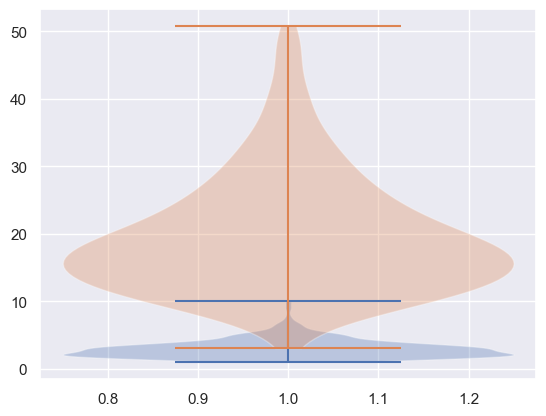

In [92]:
plt.violinplot(df.tip)
plt.violinplot(df.total_bill)